# Image classification Tensorflow using CNNs

In [249]:
import tensorflow as tf
import zipfile
from pathlib import Path
from PIL import Image
import numpy as np
from keras.src.utils.module_utils import tensorflow

%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from tensorflow.keras.preprocessing import image

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [250]:
trainSet = Path(r"E:\Datasets\CatsVsDogs\TrainingSet")
testSet = Path(r"E:\Datasets\CatsVsDogs\TestSet")

Printing a sample image of a cat

In [251]:
catsDir = trainSet / "cats"
dogsDir = trainSet / "dogs"

In [252]:
imgPathCat = random.choice(list(catsDir.glob("*.*")))
imgPathDog = random.choice(list(dogsDir.glob("*.*")))

In [253]:
imgCat = Image.open(imgPathCat)
imgDog = Image.open(imgPathDog)

In [254]:
imgCat = imgCat.convert("RGB")
imgDog = imgDog.convert("RGB")

In [255]:
imgNPCat = np.asarray(imgCat)
imgNPDog = np.asarray(imgDog)

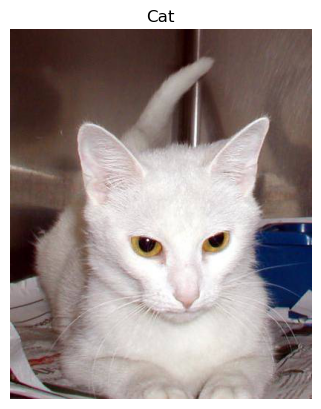

In [256]:
plt.imshow(np.asarray(imgNPCat))
plt.axis("off")
plt.title("Cat")
plt.show()

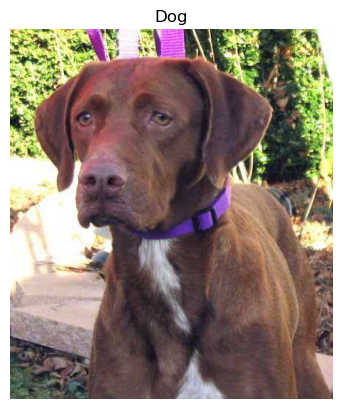

In [257]:
plt.imshow(np.asarray(imgNPDog))
plt.axis("off")
plt.title("Dog")
plt.show()

In [260]:
print(tf.__version__)

2.19.1
